In [59]:
from matplotlib.image import imread
from matplotlib.image import imsave
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.metrics import structural_similarity as ssim
images=['Tierra.jpg','tango.jpg','jordan.jpg'];

En primera instancia se calcula el porcentaje de comprensión en función de la cantidad de valores singulares considerados. Para tres imágenes diferentes se considerandan 15 valores equiespaciados de valores singulares para poder graficar la curva (a medida que aumenta la cantidad el procesamiento se vuelve demasiado lento). Se puede observar que tanto para la imagen 'Tierra.jpg' como para 'Tango.jpg', el nivel de compresión comienza a aumentar por debajo del 25% de valores singulares. Se podría llegar a pensar que una mayor compresión está asociada a una mayor pérdida de información importante de la imagen, lo cual no se confirma visualmente en las imágenes comprimidas.

Respecto a la imagen 'jordan.jpg' se observa un nivel de compresión negativo, es decir que una imagen con menor cantidad de valores singulares sería más pesada que la original (Se observó un comportamiento similar al utilizar imágenes muy pequeñas). 

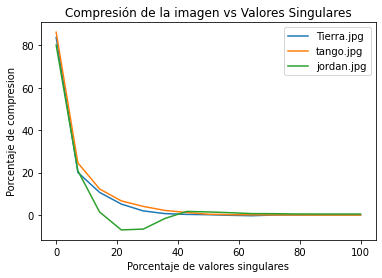

In [65]:
plot = plt.figure()
plt.ylabel('Porcentaje de compresion')
plt.xlabel('Porcentaje de valores singulares')
plt.title('Compresión de la imagen vs Valores Singulares')

for image in images: 
    file=image;
    img_orig = imread(file); # En img_orig se guarda un arreglo de tres matrices cada una de ellas contiene la intensidad del piexel en los canales RGB.
    #A=img_orig[:,:,0]; #Acá se toma uno de los canales.
    A=np.mean(img_orig,-1);# Acá se promedia la intensidad de todos los canales.
    U, S, VT=np.linalg.svd(A) # Se calcula la SVD de la matriz con la que estamos trabajando.
    S=np.diag(S) # La SVD devuelve los valores singulares y acá construimos la matriz Sigma.
    index = np.round(np.linspace(0, len(S), num=15)).astype(int)
    reduc = np.zeros(len(index))
    i = 0
    for k in index: 
        Ared = U[:,0:k] @ S[0:k,:k] @ VT[:k,:]; 
        file_red=os.path.splitext(file)[0]+'_red'+os.path.splitext(file)[1];
        imsave(file_red,Ared,cmap="gray");
        sizeOrig=os.stat(file).st_size;
        sizeRed=os.stat(file_red).st_size;
        reduc[i] = 100*(sizeOrig-sizeRed)/sizeOrig; # Porcentaje de reducción.
        i = i + 1
    plt.plot(100 * index/len(S), reduc, label=image)
plt.legend()
plt.show()


Luego se graficaron las imágenes para distintos porcentajes de valores singulares utilizados 2%, 5%, 10%, 30% y 80%, y se compararon con la imagen original. Se observa que más allá de utilizar pocos valores singulares, la imagen puede ser comprendida visualmente y no puede concluirse en que un gran valor de compresión esté asociado a una pérdida de información (por lo menos visualmente). Por debajo del 5% la pérdida de información visual comienza a ser notoria, pudiendo afirmar que en ese rango se encuentran los valores singulares más importantes (por lo menos para las imágenes de prueba utilizadas).

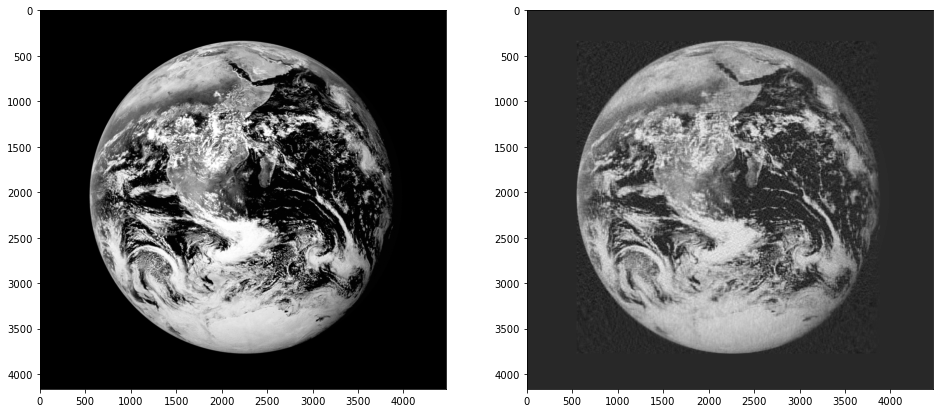

Valores Singulares: 83
Compresión: 42.64


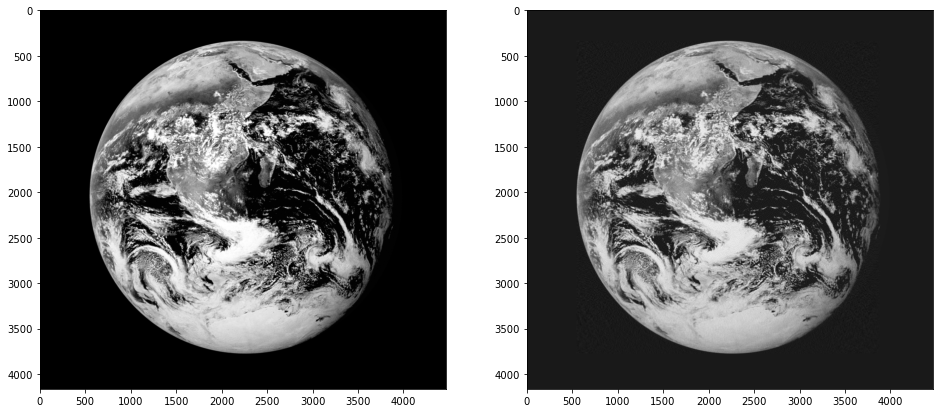

Valores Singulares: 208
Compresión: 27.12


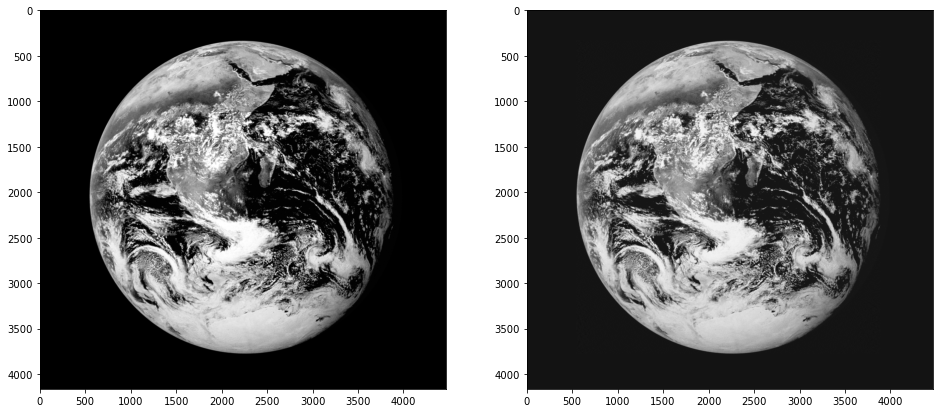

Valores Singulares: 416
Compresión: 14.97


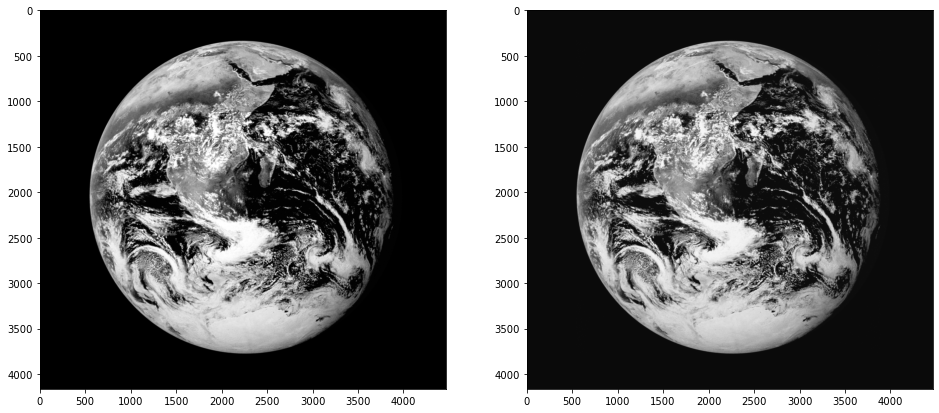

Valores Singulares: 1249
Compresión: 1.88


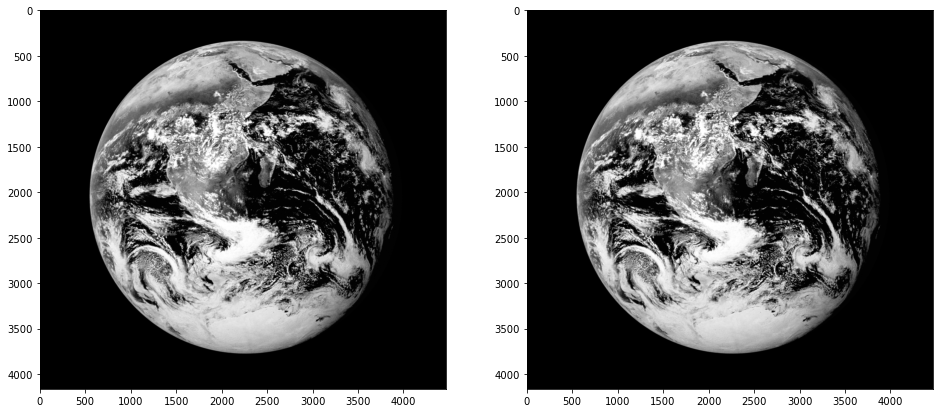

Valores Singulares: 3330
Compresión: 0.02


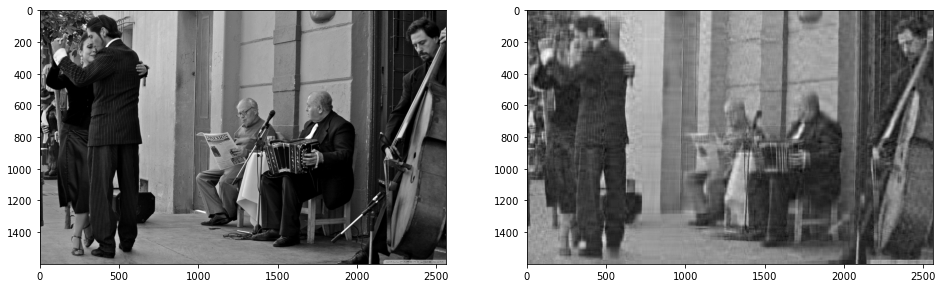

Valores Singulares: 32
Compresión: 38.96


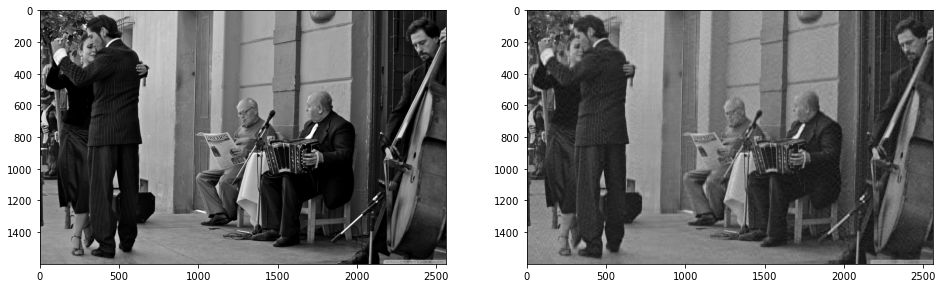

Valores Singulares: 80
Compresión: 28.89


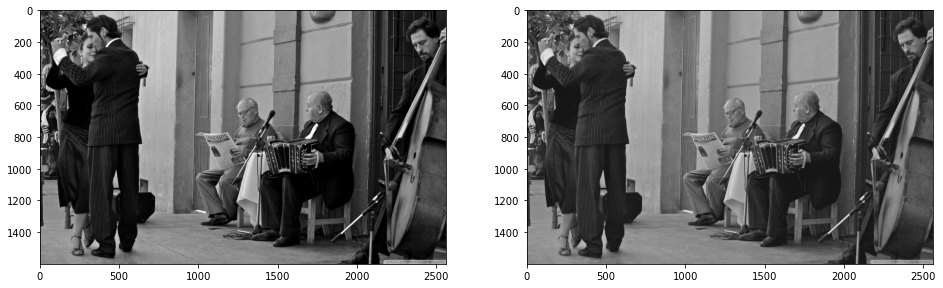

Valores Singulares: 160
Compresión: 17.11


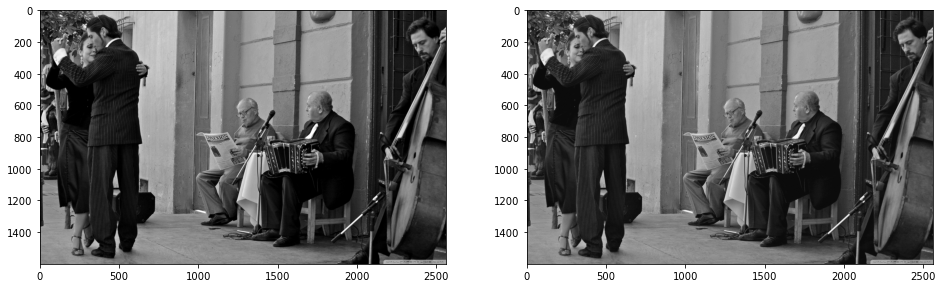

Valores Singulares: 480
Compresión: 3.82


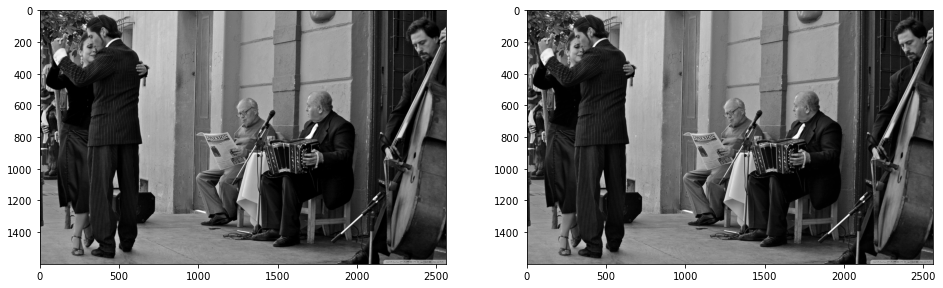

Valores Singulares: 1280
Compresión: 0.03


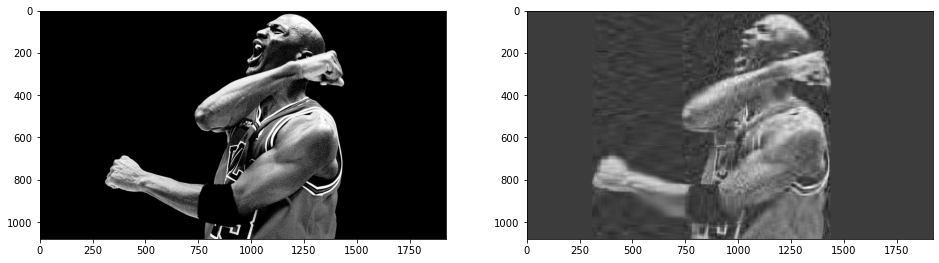

Valores Singulares: 22
Compresión: 42.43


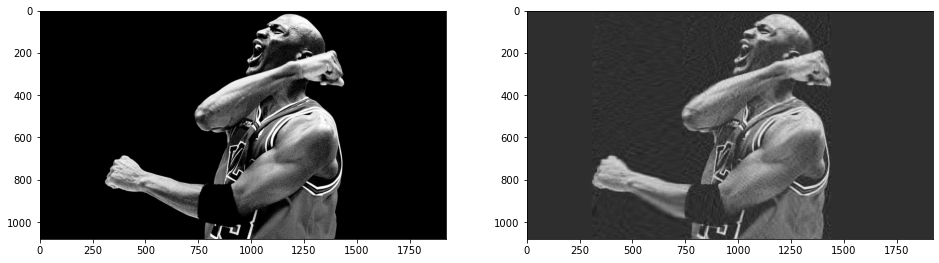

Valores Singulares: 54
Compresión: 28.11


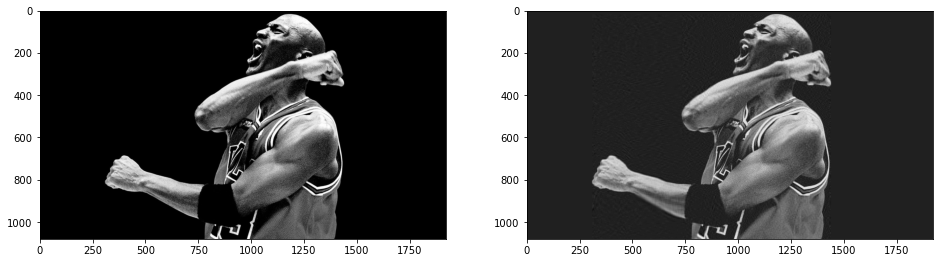

Valores Singulares: 108
Compresión: 11.9


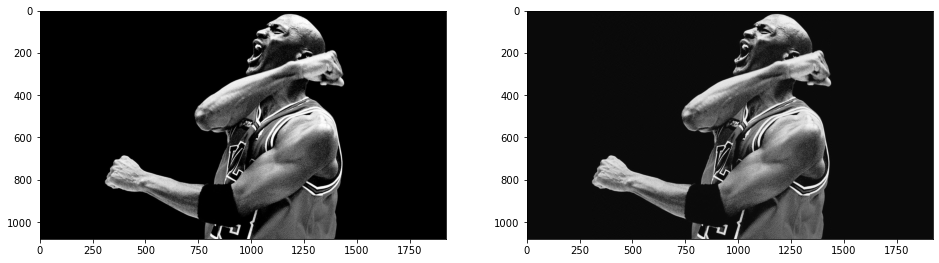

Valores Singulares: 324
Compresión: -5.93


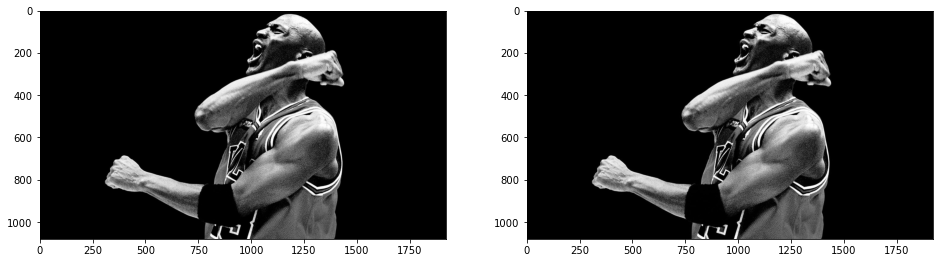

Valores Singulares: 864
Compresión: 0.5


In [69]:
for image in images: 
    file=image;
    img_orig = imread(file); # En img_orig se guarda un arreglo de tres matrices cada una de ellas contiene la intensidad del piexel en los canales RGB.
    #A=img_orig[:,:,0]; #Acá se toma uno de los canales.
    A=np.mean(img_orig,-1);# Acá se promedia la intensidad de todos los canales.
    U, S, VT=np.linalg.svd(A) # Se calcula la SVD de la matriz con la que estamos trabajando.
    S=np.diag(S) # La SVD devuelve los valores singulares y acá construimos la matriz Sigma.
    index = np.round(np.array([0.02, 0.05, 0.1, 0.3, 0.8]) * len(S)).astype(int)
    reduc = np.zeros(len(index))
    i = 0
    for k in index: 
        Ared = U[:,0:k] @ S[0:k,:k] @ VT[:k,:]; 
        file_red=os.path.splitext(file)[0]+'_red'+os.path.splitext(file)[1];
        imsave(file_red,Ared,cmap="gray");
        sizeOrig=os.stat(file).st_size;
        sizeRed=os.stat(file_red).st_size;
        reduc[i] = 100*(sizeOrig-sizeRed)/sizeOrig; # Porcentaje de reducción.
        fig=plt.figure(figsize=[16,8])
        fig.add_subplot(1, 2, 1)
        img = plt.imshow(A)
        img.set_cmap('gray')
        fig.add_subplot(1, 2, 2)
        img = plt.imshow(Ared)
        img.set_cmap('gray')
        plt.show()
        print('Valores Singulares:', k)
        print('Compresión:', np.round(reduc[i],2))
        i = i + 1

Finalmente se calculan dos métricas (MSE y Structural Similarity Index) para 15 valores equiespaciados de valores singulares, las cuales básicamente computan la distancia entre la imagen original y la comprimida. Se puede observar de las figuras debajo, que el error o distancia aumenta de gran manera cuando se utilizan menos del 5% de los valores singulares, lo cual es consistente con las imágenes graficas arriba.

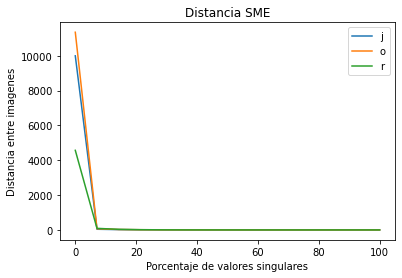

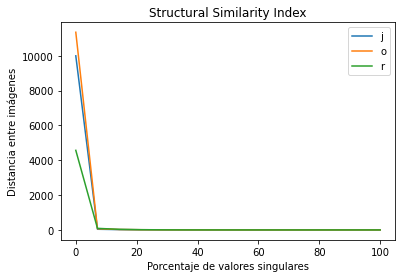

In [68]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
dist_mse_t = []
dist_ssim_t = []

for image in images: 
    file=image;
    img_orig = imread(file); # En img_orig se guarda un arreglo de tres matrices cada una de ellas contiene la intensidad del piexel en los canales RGB.
    #A=img_orig[:,:,0]; #Acá se toma uno de los canales.
    A=np.mean(img_orig,-1);# Acá se promedia la intensidad de todos los canales.
    U, S, VT=np.linalg.svd(A) # Se calcula la SVD de la matriz con la que estamos trabajando.
    S=np.diag(S) # La SVD devuelve los valores singulares y acá construimos la matriz Sigma.
    index = np.round(np.linspace(0, len(S), num=15)).astype(int)
    reduc = np.zeros(len(index))
    dist_mse = np.zeros(len(index))
    dist_ssim = np.zeros(len(index))
    i = 0
    for k in index: 
        Ared = U[:,0:k] @ S[0:k,:k] @ VT[:k,:]; 
        file_red=os.path.splitext(file)[0]+'_red'+os.path.splitext(file)[1];
        imsave(file_red,Ared,cmap="gray");
        sizeOrig=os.stat(file).st_size;
        sizeRed=os.stat(file_red).st_size;
        reduc[i] = 100*(sizeOrig-sizeRed)/sizeOrig; # Porcentaje de reducción.
        dist_mse[i] = mse (A, Ared)
        dist_ssim[i] = ssim (A, Ared)
        i = i + 1 
    dist_mse_t.append(dist_mse)
    dist_ssim_t.append(dist_mse)

plot = plt.figure(1)
plt.ylabel('Distancia entre imagenes')
plt.xlabel('Porcentaje de valores singulares')
plt.title('Distancia SME')
for i in range(0, len(dist_mse_t)):
    plt.plot(100 * index/len(S), dist_mse_t[i], label=image[i])
plt.legend()
plt.show()

plot = plt.figure(2)
plt.ylabel('Distancia entre imágenes')
plt.xlabel('Porcentaje de valores singulares')
plt.title('Structural Similarity Index')
for i in range(0, len(dist_mse_t)):
    plt.plot(100 * index/len(S), dist_ssim_t[i], label=image[i])
plt.legend()
plt.show()